In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(42)

## 1. Data Loading and Preprocessing

In [13]:
# Load the fruit dataset
data = pd.read_csv('fruit.csv')
print("Dataset shape:", data.shape)
print("\nFirst few rows:")
print(data.head())
print("\nDataset summary:")
print(data.describe())
print("\nLabel distribution:")
print(data['label'].value_counts())

Dataset shape: (12, 4)

First few rows:
   length_cm  weight_g  yellow_score  label
0        7.2       180          0.10      0
1        8.1       220          0.15      0
2        6.8       160          0.08      0
3        7.5       190          0.12      0
4        6.9       170          0.09      0

Dataset summary:
       length_cm    weight_g  yellow_score      label
count  12.000000   12.000000     12.000000  12.000000
mean   12.975000  154.583333      0.484167   0.500000
std     5.874618   37.686405      0.391349   0.522233
min     6.800000  105.000000      0.080000   0.000000
25%     7.425000  123.750000      0.115000   0.000000
50%    12.800000  150.000000      0.450000   0.500000
75%    18.600000  182.500000      0.857500   1.000000
max    19.500000  220.000000      0.950000   1.000000

Label distribution:
label
0    6
1    6
Name: count, dtype: int64


In [14]:
# Separate features and labels
X = data[['length_cm', 'weight_g', 'yellow_score']].values
y = data['label'].values

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Add bias term (intercept)
X_with_bias = np.column_stack([np.ones(X_scaled.shape[0]), X_scaled])

print("Features shape:", X_scaled.shape)
print("Features with bias shape:", X_with_bias.shape)
print("Labels shape:", y.shape)

Features shape: (12, 3)
Features with bias shape: (12, 4)
Labels shape: (12,)


## 2. Single-Neuron Logistic Model Implementation

In [15]:
class SingleNeuronLogistic:
    def __init__(self, input_size):
        self.weights = np.random.randn(input_size) * 0.01
        self.bias = 0.0
        
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-np.clip(z, -500, 500)))
    
    def forward(self, X):
        z = np.dot(X, self.weights) + self.bias
        return self.sigmoid(z)
    
    def compute_loss(self, y_pred, y_true):
        epsilon = 1e-15
        y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
        loss = -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
        return loss
    
    def compute_gradients(self, X, y_pred, y_true):
        m = X.shape[0]
        dw = (1/m) * np.dot(X.T, (y_pred - y_true))
        db = np.mean(y_pred - y_true)
        return dw, db
    
    def train(self, X, y, learning_rate=0.1, epochs=500, loss_threshold=0.05):
        losses = []
        accuracies = []
        
        for epoch in range(epochs):
            y_pred = self.forward(X)
            loss = self.compute_loss(y_pred, y)
            y_pred_class = (y_pred >= 0.5).astype(int)
            accuracy = accuracy_score(y, y_pred_class)
            
            losses.append(loss)
            accuracies.append(accuracy)
            
            if loss < loss_threshold:
                print(f"Converged at epoch {epoch} with loss {loss:.4f}")
                break
            
            dw, db = self.compute_gradients(X, y_pred, y)
            self.weights -= learning_rate * dw
            self.bias -= learning_rate * db
            
            if epoch % 50 == 0:
                print(f"Epoch {epoch}: Loss = {loss:.4f}, Accuracy = {accuracy:.4f}")
        
        return losses, accuracies
    
    def predict(self, X):
        y_pred = self.forward(X)
        return (y_pred >= 0.5).astype(int)
    
    def get_initial_predictions(self, X):
        current_weights = self.weights.copy()
        current_bias = self.bias
        
        self.weights = np.random.randn(self.weights.shape[0]) * 0.01
        self.bias = 0.0
        
        y_pred = self.forward(X)
        y_pred_class = (y_pred >= 0.5).astype(int)
        
        self.weights = current_weights
        self.bias = current_bias
        
        return y_pred_class

## 3. Model Training

In [16]:
# Initialize model
input_size = X_with_bias.shape[1]
model = SingleNeuronLogistic(input_size)

print(f"Model initialized with {input_size} input features")
print(f"Initial weights: {model.weights}")
print(f"Initial bias: {model.bias}")

Model initialized with 4 input features
Initial weights: [ 0.00496714 -0.00138264  0.00647689  0.0152303 ]
Initial bias: 0.0


In [17]:
# Get initial random predictions
initial_predictions = model.get_initial_predictions(X_with_bias)
initial_accuracy = accuracy_score(y, initial_predictions)
print(f"Initial random predictions accuracy: {initial_accuracy:.4f}")
print(f"Initial predictions: {initial_predictions}")
print(f"True labels: {y}")

Initial random predictions accuracy: 0.1667
Initial predictions: [1 1 0 1 0 1 0 0 0 0 0 0]
True labels: [0 0 0 0 0 0 1 1 1 1 1 1]


In [18]:
# Train the model
learning_rate = 0.1
epochs = 500
loss_threshold = 0.05

print(f"Training with learning rate: {learning_rate}")
print(f"Maximum epochs: {epochs}")
print(f"Loss threshold: {loss_threshold}")
print("-" * 50)

losses, accuracies = model.train(X_with_bias, y, learning_rate, epochs, loss_threshold)

print("-" * 50)
print(f"Training completed in {len(losses)} epochs")
print(f"Final loss: {losses[-1]:.4f}")
print(f"Final accuracy: {accuracies[-1]:.4f}")
print(f"Final weights: {model.weights}")
print(f"Final bias: {model.bias}")

Training with learning rate: 0.1
Maximum epochs: 500
Loss threshold: 0.05
--------------------------------------------------
Epoch 0: Loss = 0.6892, Accuracy = 0.8333
Epoch 50: Loss = 0.0783, Accuracy = 1.0000
Converged at epoch 79 with loss 0.0498
--------------------------------------------------
Training completed in 80 epochs
Final loss: 0.0498
Final accuracy: 1.0000
Final weights: [-0.00210425  1.09251515 -0.92691772  1.10271536]
Final bias: -0.007071390307905854


## 4. Results Visualization

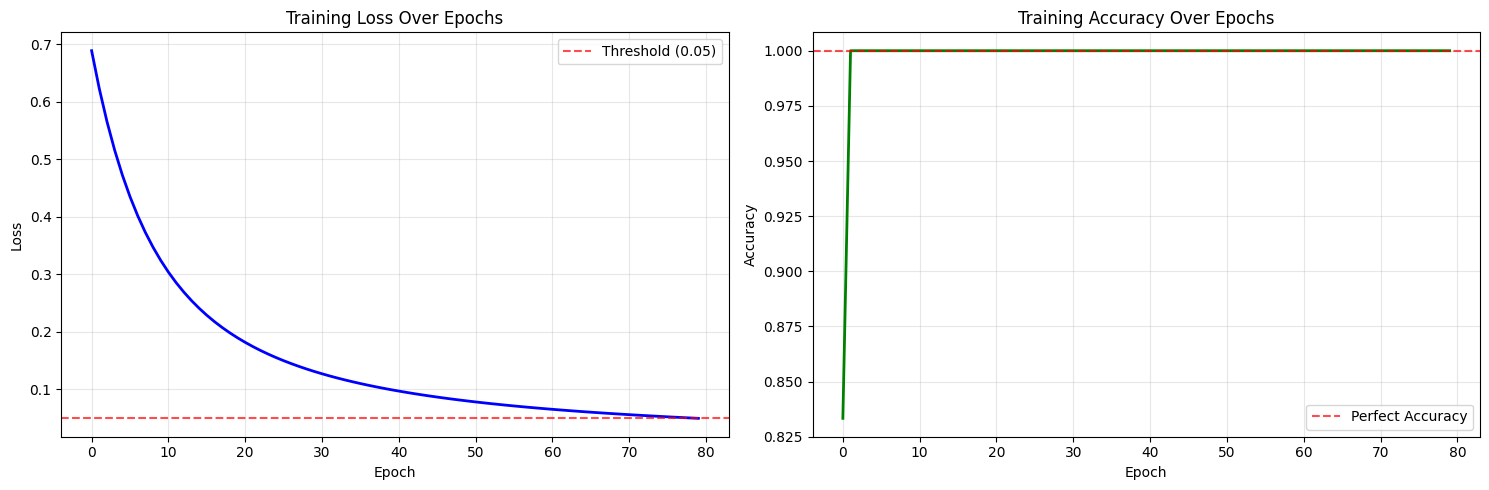

In [19]:
# Plot training progress
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Plot loss
ax1.plot(losses, 'b-', linewidth=2)
ax1.set_title('Training Loss Over Epochs')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.grid(True, alpha=0.3)
ax1.axhline(y=loss_threshold, color='r', linestyle='--', alpha=0.7, label=f'Threshold ({loss_threshold})')
ax1.legend()

# Plot accuracy
ax2.plot(accuracies, 'g-', linewidth=2)
ax2.set_title('Training Accuracy Over Epochs')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')
ax2.grid(True, alpha=0.3)
ax2.axhline(y=1.0, color='r', linestyle='--', alpha=0.7, label='Perfect Accuracy')
ax2.legend()

plt.tight_layout()
plt.show()

In [20]:
# Final predictions and evaluation
final_predictions = model.predict(X_with_bias)
final_accuracy = accuracy_score(y, final_predictions)

print("Final Results:")
print(f"Final predictions: {final_predictions}")
print(f"True labels: {y}")
print(f"Final accuracy: {final_accuracy:.4f}")
print(f"Final loss: {losses[-1]:.4f}")

# Compare initial vs final
print("\nComparison:")
print(f"Initial accuracy: {initial_accuracy:.4f}")
print(f"Final accuracy: {final_accuracy:.4f}")
print(f"Improvement: {final_accuracy - initial_accuracy:.4f}")

Final Results:
Final predictions: [0 0 0 0 0 0 1 1 1 1 1 1]
True labels: [0 0 0 0 0 0 1 1 1 1 1 1]
Final accuracy: 1.0000
Final loss: 0.0498

Comparison:
Initial accuracy: 0.1667
Final accuracy: 1.0000
Improvement: 0.8333


## 5. Learning Rate Impact Analysis

In [21]:
# Test different learning rates
learning_rates = [0.01, 0.05, 0.1, 0.5, 1.0]
results = {}

for lr in learning_rates:
    print(f"\nTesting learning rate: {lr}")
    
    model_lr = SingleNeuronLogistic(input_size)
    losses_lr, accuracies_lr = model_lr.train(X_with_bias, y, lr, epochs, loss_threshold)
    
    results[lr] = {
        'epochs': len(losses_lr),
        'final_loss': losses_lr[-1],
        'final_accuracy': accuracies_lr[-1],
        'converged': losses_lr[-1] < loss_threshold
    }
    
    print(f"  Epochs: {len(losses_lr)}")
    print(f"  Final loss: {losses_lr[-1]:.4f}")
    print(f"  Final accuracy: {accuracies_lr[-1]:.4f}")
    print(f"  Converged: {losses_lr[-1] < loss_threshold}")


Testing learning rate: 0.01
Epoch 0: Loss = 0.6907, Accuracy = 0.7500
Epoch 50: Loss = 0.4416, Accuracy = 1.0000
Epoch 100: Loss = 0.3103, Accuracy = 1.0000
Epoch 150: Loss = 0.2342, Accuracy = 1.0000
Epoch 200: Loss = 0.1861, Accuracy = 1.0000
Epoch 250: Loss = 0.1534, Accuracy = 1.0000
Epoch 300: Loss = 0.1301, Accuracy = 1.0000
Epoch 350: Loss = 0.1126, Accuracy = 1.0000
Epoch 400: Loss = 0.0991, Accuracy = 1.0000
Epoch 450: Loss = 0.0884, Accuracy = 1.0000
  Epochs: 500
  Final loss: 0.0799
  Final accuracy: 1.0000
  Converged: False

Testing learning rate: 0.05
Epoch 0: Loss = 0.6978, Accuracy = 0.2500
Epoch 50: Loss = 0.1527, Accuracy = 1.0000
Epoch 100: Loss = 0.0794, Accuracy = 1.0000
Epoch 150: Loss = 0.0531, Accuracy = 1.0000
Converged at epoch 160 with loss 0.0497
  Epochs: 161
  Final loss: 0.0497
  Final accuracy: 1.0000
  Converged: True

Testing learning rate: 0.1
Epoch 0: Loss = 0.6946, Accuracy = 0.4167
Epoch 50: Loss = 0.0785, Accuracy = 1.0000
Converged at epoch 79 

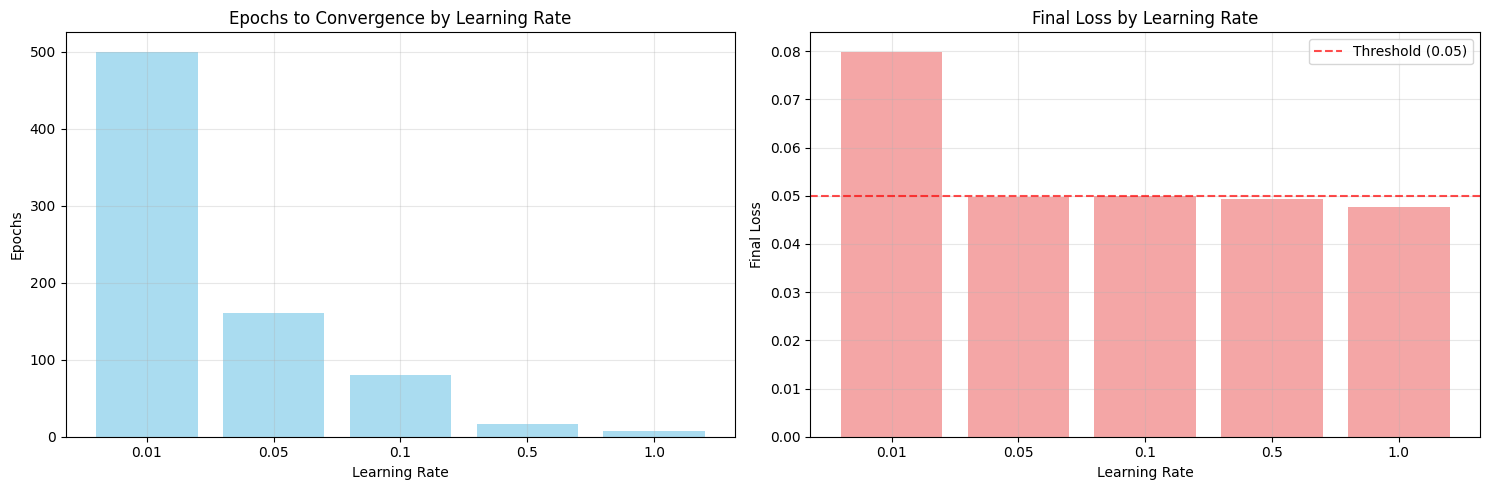


Learning Rate Impact Summary:
LR		Epochs		Final Loss		Final Acc		Converged
----------------------------------------------------------------------
0.01		500		0.0799		1.0000		False
0.05		161		0.0497		1.0000		True
0.1		80		0.0499		1.0000		True
0.5		16		0.0493		1.0000		True
1.0		8		0.0476		1.0000		True


In [22]:
# Plot learning rate comparison
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

lrs = list(results.keys())
epochs_to_conv = [results[lr]['epochs'] for lr in lrs]
final_losses = [results[lr]['final_loss'] for lr in lrs]

ax1.bar(range(len(lrs)), epochs_to_conv, color='skyblue', alpha=0.7)
ax1.set_title('Epochs to Convergence by Learning Rate')
ax1.set_xlabel('Learning Rate')
ax1.set_ylabel('Epochs')
ax1.set_xticks(range(len(lrs)))
ax1.set_xticklabels(lrs)
ax1.grid(True, alpha=0.3)

ax2.bar(range(len(lrs)), final_losses, color='lightcoral', alpha=0.7)
ax2.set_title('Final Loss by Learning Rate')
ax2.set_xlabel('Learning Rate')
ax2.set_ylabel('Final Loss')
ax2.set_xticks(range(len(lrs)))
ax2.set_xticklabels(lrs)
ax2.grid(True, alpha=0.3)
ax2.axhline(y=loss_threshold, color='r', linestyle='--', alpha=0.7, label=f'Threshold ({loss_threshold})')
ax2.legend()

plt.tight_layout()
plt.show()

# Summary table
print("\nLearning Rate Impact Summary:")
print("LR\t\tEpochs\t\tFinal Loss\t\tFinal Acc\t\tConverged")
print("-" * 70)
for lr in lrs:
    print(f"{lr}\t\t{results[lr]['epochs']}\t\t{results[lr]['final_loss']:.4f}\t\t{results[lr]['final_accuracy']:.4f}\t\t{results[lr]['converged']}")